# GraphViz Chain

In this notebook, we construct a graph of a chain of models.

## Preliminaries

In [1]:
import os
import sys
import networkx as nx

from os.path import dirname

note_dir = os.getcwd()

root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus.tests import default_chain, default_ensemble
from morpheus.graph import (add_positions,
                            model_to_graph,
                            model_graph_traces,
                            model_graph_layout, 
                            convert_positions_to_dot_format)

## Build Chain

In [2]:
chain = default_ensemble()


        Learning model with desc ids:    [0, 1, 2]
                            targ ids:    [5]
        

        Learning model with desc ids:    [0, 1, 3]
                            targ ids:    [4, 5]
        


In [3]:
chain.pretty_print()


        # Main
        Descriptive attributes:     [0. 1. 2. 3.]
        Target attributes:          [4. 5.]

        ## On types (mostly nominals)
        Target attribute types:                     ['numeric', 'numeric']
        N_classes of nominal target attributes:     []
        Classes of nominal target attributes:       []

        ## Weights
        Total weights of target attributes:         [1. 2.]

         
        ## Estimators
        Estimators used:        ['RandomForestRegressor', 'RandomForestRegressor']
        N_estimators:           2
        


## Build Graph

In [4]:
model_one = chain.estimators_[0]
model_two = chain.estimators_[1]

In [5]:
G_one = model_to_graph(model_one, idx=1)
G_two = model_to_graph(model_two, idx=2)
G_three = model_to_graph(model_two, idx=3)

In [6]:
G_chain = nx.compose(G_one, G_two)

In [7]:
G_chain = nx.compose(G_chain, G_three)

In [8]:
for n in G_chain.nodes():
    if G_chain.nodes()[n]['bipartite'] == 'func':
        G_chain.nodes()[n]['shape'] = "\"square\""
        G_chain.nodes()[n]['width'] = "2.5"
    else:
        G_chain.nodes()[n]['shape'] = "\"circle\""

## Build graph from ensemble

Now,we try to combine.

In [9]:
from networkx.drawing.nx_pydot import to_pydot

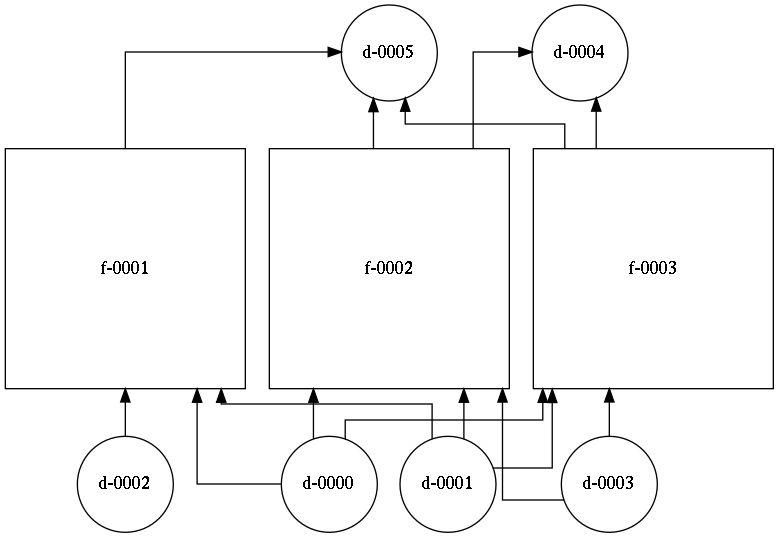

In [10]:
X = to_pydot(G_chain)
X.set('rankdir', 'BT')
X.set('splines', 'ortho')

with open("test.dot", "w") as text_file:
    print(X.to_string(), file=text_file)
    
!dot -T png test.dot > test.png  # Bash command

from IPython.display import Image, display
from IPython.core.display import HTML 

display(Image('test.png', unconfined=True))

In [11]:
G = G_chain.copy()

In [12]:
def add_merge_nodes(G):
    data_nodes = [n for n in G.nodes() if G.nodes()[n]['bipartite']=='data']
    
    mapping = {}
    for node in data_nodes:
        if len(G.in_edges(node)) > 1:
            mapping[node] = "merge-{}".format(node)
    
    nx.relabel_nodes(G, mapping, copy=False)
    
    return 

In [13]:
add_merge_nodes(G)

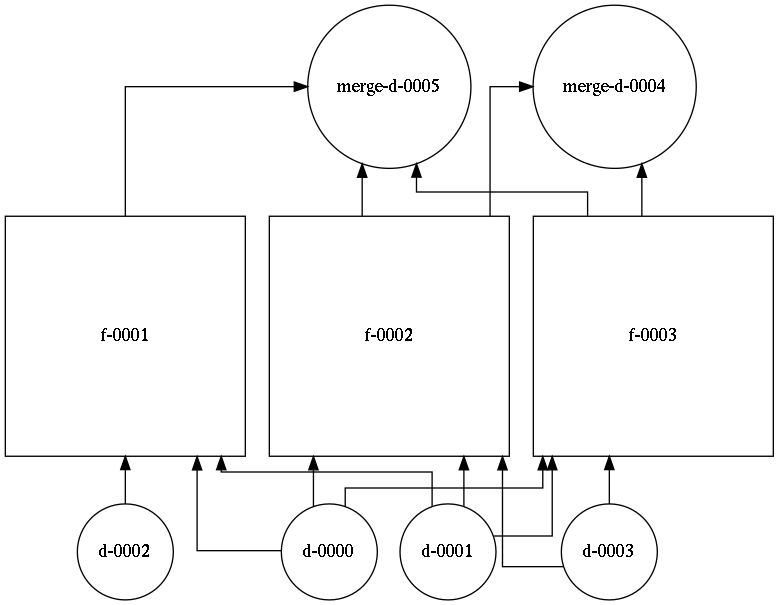

In [15]:
X = to_pydot(G)
X.set('rankdir', 'BT')
X.set('splines', 'ortho')

with open("test.dot", "w") as text_file:
    print(X.to_string(), file=text_file)
    
!dot -T png test.dot > test.png  # Bash command

from IPython.display import Image, display
from IPython.core.display import HTML 

display(Image('test.png', unconfined=True))